In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sc


import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot
import plotly.offline as py
import plotly.figure_factory as ff

import seaborn as sb

import pandas_profiling

In [2]:
init_notebook_mode(connected=True)

In [3]:
%matplotlib inline

Lectura de la fuente de información

In [4]:
df = pd.read_csv('./data_COVID19Mx/Confirmados/COVID19Mx_confirmados27-03-20.csv',index_col=0)

Los metadatos de la fuente de información

In [5]:
df.columns

Index(['index', 'NumCaso', 'Estado', 'Sexo', 'Edad', 'Fecha_Diagnóstico',
       'Identificación', 'Procedencia', 'Llegada_México'],
      dtype='object')

In [6]:
df.head()

,index,NumCaso,Estado,Sexo,Edad,Fecha_Diagnóstico,Identificación,Procedencia,Llegada_México
0,302,303,MÉXICO,M,44,2020-02-19,confirmado,Italia,22/02/2020
1,5,6,MÉXICO,M,71,2020-02-21,confirmado,Italia,21/02/2020
2,0,1,CDMX,M,35,2020-02-22,confirmado,Italia,22/02/2020
3,1,2,SINALOA,M,41,2020-02-22,confirmado,Italia,21/02/2020
4,2,3,CDMX,M,59,2020-02-23,confirmado,Italia,22/02/2020


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 717 entries, 0 to 716
Data columns (total 9 columns):
index                717 non-null int64
NumCaso              717 non-null int64
Estado               717 non-null object
Sexo                 717 non-null object
Edad                 717 non-null int64
Fecha_Diagnóstico    717 non-null object
Identificación       717 non-null object
Procedencia          717 non-null object
Llegada_México       498 non-null object
dtypes: int64(3), object(6)
memory usage: 56.0+ KB


In [8]:
DataFrameAnalisisEstadistico=df.describe()

In [9]:
DataFrameAnalisisEstadistico

,index,NumCaso,Edad
count,717.000000,717.000000,717.000000
mean,358.000000,359.000000,42.541144
std,207.124359,207.124359,15.866589
min,0.000000,1.000000,0.000000
25%,179.000000,180.000000,30.000000
50%,358.000000,359.000000,41.000000
75%,537.000000,538.000000,54.000000
max,716.000000,717.000000,88.000000


In [10]:
d=ff.create_table(DataFrameAnalisisEstadistico)

In [11]:
iplot(d)

In [12]:
pandas_profiling.ProfileReport(df)

/home/saxsa/anaconda3/lib/python3.7/site-packages/pandas_profiling/describe.py:392: FutureWarning:

The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.



Number of variables,9
Number of observations,717
Total Missing (%),3.4%
Total size in memory,56.0 KiB
Average record size in memory,80.0 B
Numeric,2
Categorical,5
Boolean,0
Date,0
Text (Unique),0
Rejected,2


In [13]:
AnalisisEstadisticoPromedioXGenero=df.groupby('Sexo').mean()

In [14]:
AnalisisEstadisticoPromedioXGenero

,index,NumCaso,Edad
Sexo,,,
F,388.702265,389.702265,41.449838
M,334.747549,335.747549,43.367647


In [15]:
ColoresComponentesTabla=[[0,'#4d004c'],[.5,'#f2e5ff'],[1,'#ffffff']]

In [16]:
ColoresLetra=['#000000']

In [17]:
dz=ff.create_table(AnalisisEstadisticoPromedioXGenero,index=True,colorscale=ColoresComponentesTabla,font_colors=ColoresLetra)
iplot(dz)

## Despliegue gráfico de resultados

In [18]:
col="Sexo"
AnalisisFrecuenciaXGenero=df[col].value_counts().reset_index()

In [19]:
AnalisisFrecuenciaXGenero

,index,Sexo
0,M,408
1,F,309


In [20]:
AnalisisFrecuenciaXGenero=AnalisisFrecuenciaXGenero.rename(columns={col:"count","index":col})

In [21]:
AnalisisFrecuenciaXGenero

,Sexo,count
0,M,408
1,F,309


## Gráfica distribución registros X género

In [22]:
trace=go.Pie(labels=AnalisisFrecuenciaXGenero[col],values=AnalisisFrecuenciaXGenero['count'],pull=[0.05,0])
layout={'title':'Género(Hombre, Mujer)'}
fig=go.Figure(data=[trace],layout=layout)
iplot(fig)

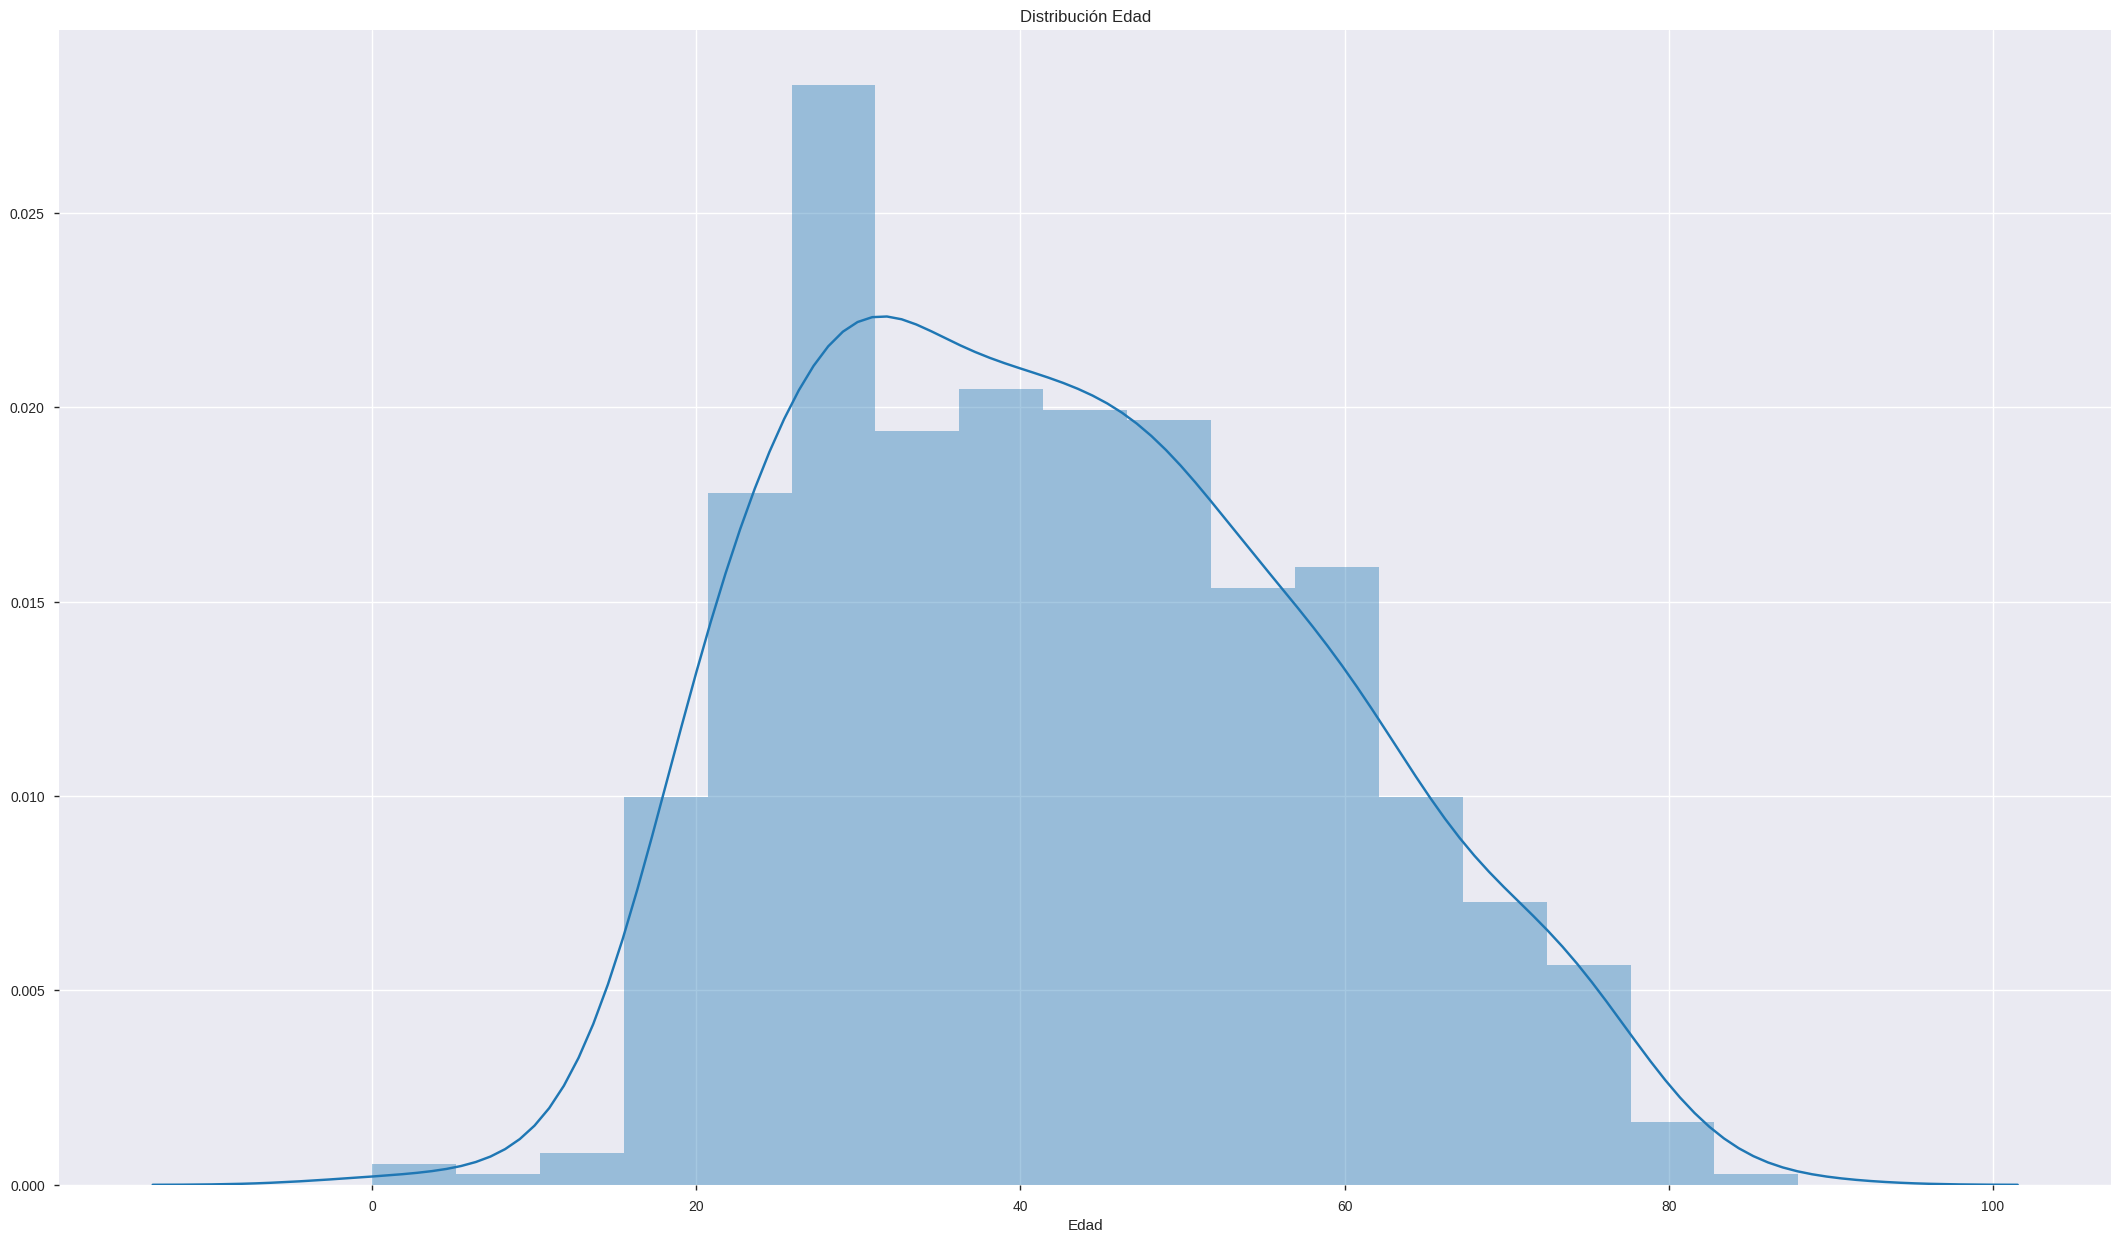

In [23]:
plt.figure(figsize=(90,15))
plt.subplot(1,3,1)
sns.distplot(df["Edad"])
plt.title('Distribución Edad')

plt.show()

In [24]:
x=df

In [25]:
d1=x[x['Sexo']=='M']

In [26]:
d1

,index,NumCaso,Estado,Sexo,Edad,Fecha_Diagnóstico,Identificación,Procedencia,Llegada_México
0,302,303,MÉXICO,M,44,2020-02-19,confirmado,Italia,22/02/2020
1,5,6,MÉXICO,M,71,2020-02-21,confirmado,Italia,21/02/2020
2,0,1,CDMX,M,35,2020-02-22,confirmado,Italia,22/02/2020
3,1,2,SINALOA,M,41,2020-02-22,confirmado,Italia,21/02/2020
4,2,3,CDMX,M,59,2020-02-23,confirmado,Italia,22/02/2020
...,...,...,...,...,...,...,...,...,...
708,640,641,MÉXICO,M,41,2020-03-24,confirmado,Contacto,NaN
710,537,538,NAYARIT,M,53,2020-03-24,confirmado,Contacto,24/03/2020
711,707,708,BAJA_CALIFORNIA_SUR,M,73,2020-03-24,confirmado,Contacto,26/03/2020
713,688,689,JALISCO,M,64,2020-03-24,confirmado,Contacto,NaN


In [27]:
d2=x[x['Sexo']=='F']

In [28]:
d2

,index,NumCaso,Estado,Sexo,Edad,Fecha_Diagnóstico,Identificación,Procedencia,Llegada_México
5,4,5,CHIAPAS,F,18,2020-02-25,confirmado,Italia,25/02/2020
6,3,4,COAHUILA,F,20,2020-02-27,confirmado,Italia,25/02/2020
8,25,26,QUINTANA_ROO,F,71,2020-03-01,confirmado,Italia,01/03/2020
9,659,660,CDMX,F,50,2020-03-01,confirmado,EUA,08/03/2020
10,32,33,JALISCO,F,64,2020-03-01,confirmado,Alemania,09/03/2020
...,...,...,...,...,...,...,...,...,...
707,443,444,GUERRERO,F,82,2020-03-23,confirmado,España,13/03/2020
709,601,602,TABASCO,F,29,2020-03-24,confirmado,España,18/03/2020
712,617,618,MÉXICO,F,22,2020-03-24,confirmado,Contacto,NaN
714,695,696,AGUASCALIENTES,F,37,2020-03-25,confirmado,Contacto,NaN


In [29]:
x=df
col='Edad'
v1=x[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x: 100 *x/sum(v1['count']))
v1=v1.sort_values(col)
trace1=go.Bar(x=v1[col],y=v1["count"],name="0",marker=dict(color="rgb(63, 72, 204)"))
y=[trace1]
layout={'title':"Distribución X Edad ",'xaxis':{'title':"Edad"},'yaxis':{'title':"Frecuencia"}}
fig=go.Figure(data=y,layout=layout)
fig.layout.template='presentation'
iplot(fig)

In [30]:
col='Edad'


v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x:100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x:100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1=go.Scatter(x = v1[col], y = v1["count"],name="Hombre",marker=dict(color="#ff7f0e"))
trace2= go.Scatter(x = v2[col],y = v2["count"], name = "Mujer", marker = dict(color='#a678de'))
y = [trace1, trace2]
layout={'title':"Comparación X Edad [[ Hombre vs Mujer ]] ",'xaxis':{'title':"Edad"},'yaxis':{'title':"Frecuencia"}}
fig=go.Figure(data = y, layout = layout)
fig.layout.template='presentation'
iplot(fig)

In [31]:
x=df
col='Estado'
v1=x[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x: 100 *x/sum(v1['count']))
v1=v1.sort_values(col)
trace1=go.Bar(x=v1[col],y=v1["count"],name="0",marker=dict(color="#e377c2"))
y=[trace1]
layout={'title':"Distribución X Estado ",'xaxis':{'title':""},'yaxis':{'title':"Frecuencia"}}
fig=go.Figure(data=y,layout=layout)
fig.layout.template='presentation'
iplot(fig)

In [32]:
col='Estado'


v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x:100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x:100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1=go.Scatter(x = v1[col], y = v1["count"],name="Hombre",marker=dict(color="#d62728"))
trace2= go.Scatter(x = v2[col],y = v2["count"], name = "Mujer", marker = dict(color='rgb(63, 72, 204)'))
y = [trace1, trace2]
layout={'title':"Comparación X Estado [[ Hombre vs Mujer ]] ",'xaxis':{'title':"Estado"},'yaxis':{'title':"Frecuencia"}}
fig=go.Figure(data = y, layout = layout)
fig.layout.template='presentation'
iplot(fig)

In [33]:
x = df
col='Procedencia'
v1=x[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x: 100 *x/sum(v1['count']))
v1=v1.sort_values(col)
trace1=go.Bar(x=v1[col],y=v1["count"],name="0",marker=dict(color="#6ad49b"))
y=[trace1]
layout={'title':"Procedencia de la infección ",'xaxis':{'title':"Procedencia"},'yaxis':{'title':"Frecuencia"}}
fig=go.Figure(data=y,layout=layout)
fig.layout.template='presentation'
iplot(fig)

In [34]:
col='Procedencia'


v1=d1[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x:100*x/sum(v1['count']))
v1=v1.sort_values(col)
v2=d2[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x:100*x/sum(v2['count']))
v2=v2.sort_values(col)
trace1=go.Scatter(x = v1[col], y = v1["count"],name="Hombre",marker=dict(color="#17becf"))
trace2= go.Scatter(x = v2[col],y = v2["count"], name = "Mujer", marker = dict(color='#a678de'))
y = [trace1, trace2]
layout={'title':"Comparación X Procedencia [[ Hombre vs Mujer ]] ",'xaxis':{'title':"Procedencia"},'yaxis':{'title':"Frecuencia"}}
fig=go.Figure(data = y, layout = layout)
fig.layout.template='presentation'
iplot(fig)

# Serie de tiempo: Casos por fecha

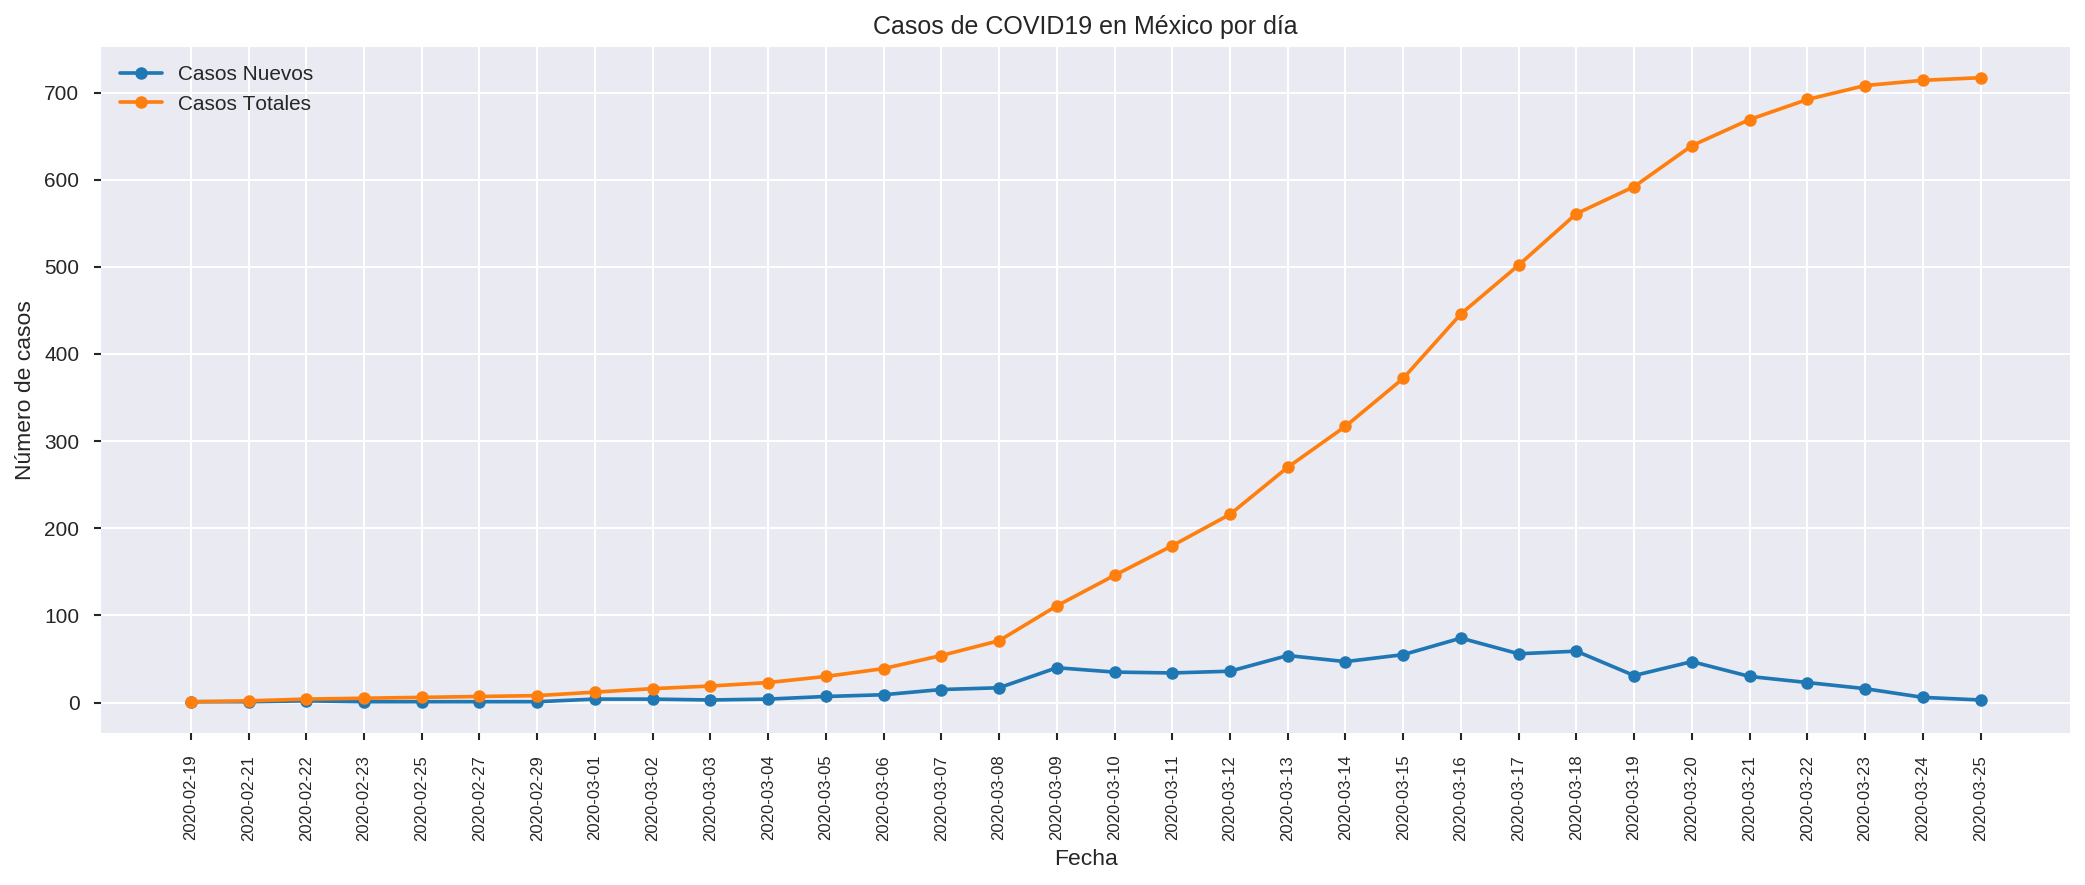

In [35]:
casos_fecha = pd.DataFrame(df['Identificación'].groupby(df['Fecha_Diagnóstico']).count())

fig = plt.figure(figsize=(14,6),dpi=150)
ax=plt.gca()
ax.plot(casos_fecha,
        marker='.',
        ms=12,
        label='Casos Nuevos')

ax.plot(sc.cumsum(casos_fecha),
        marker='.',
        ms=12,label='Casos Totales')

plt.legend()
plt.xticks(casos_fecha.index)
plt.xticks(fontsize=8,rotation=90)
plt.ylabel('Número de casos')
plt.xlabel('Fecha')
plt.title('Casos de COVID19 en México por día')
plt.tight_layout()